In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 

pyber_ride_df = pd.read_csv("Resources/Pyber_ride_data.csv") 

In [3]:
# What Do You Want to Do?                      Use These Charts
# Compare values of datasets                   Line, bar, scatter, and pie
# Show how individual parts make up a whole    Pie and stacked bar
# Show distribution of the data and outliers   Line, bar, scatter, and box-and-whisker
# Show trends over time                        Line or bar
# Establish relationships between variables    Line, scatter, and bubble

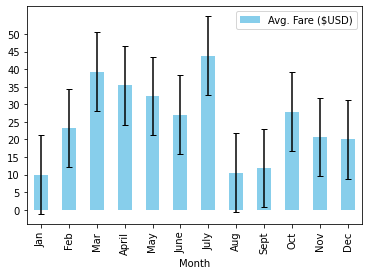

In [4]:
#Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
xtick_locations = [value for value in x_axis] 
ytick_locations = np.arange(0,55,5)
stdev = statistics.stdev(pyber_ride_df["Avg. Fare ($USD)"])
stdev
#Plot the data
stdev 
pyber_ride_df.plot(x="Month", 
                   y="Avg. Fare ($USD)", 
                   kind="bar", 
                   yerr=stdev, 
                   capsize=3, 
                   color="skyblue")

plt.xticks(xtick_locations, pyber_ride_df["Month"])
plt.yticks(ytick_locations)
plt.show()

#Questions
#If we are using pandas dataframe to plot, then why do we reference matplotlib to adjust the settings like xticks? 


In [5]:
pyber_ride_df = pd.read_csv("Resources/ride_data.csv") 
pyber_city_df = pd.read_csv("Resources/city_data.csv") 

In [19]:
pyber_city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [20]:
pyber_ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [13]:
pyber_ride_complete_df = pyber_ride_df.merge(pyber_city_df,left_on=pyber_ride_df["city"],right_on=pyber_city_df["city"])
pyber_ride_complete_df.head()


,key_0,city_x,date,fare,ride_id,city_y,driver_count,type
0,Lake Jonathanshire,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,Lake Jonathanshire,5,Urban
1,Lake Jonathanshire,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,Lake Jonathanshire,5,Urban
2,Lake Jonathanshire,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,Lake Jonathanshire,5,Urban
3,Lake Jonathanshire,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,Lake Jonathanshire,5,Urban
4,Lake Jonathanshire,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,Lake Jonathanshire,5,Urban


In [25]:
pyber_ride_summary_df = pyber_ride_complete_df.groupby(pyber_ride_complete_df["type"]).agg({"fare":"mean","ride_id":"count"})
pyber_ride_summary_df

,fare,ride_id
type,,
Rural,34.623440,125
Suburban,30.970128,625
Urban,24.525772,1625


In [34]:
city_type_driver_count = pyber_city_df.groupby(pyber_city_df["type"]).agg({"driver_count":"sum","city":"count"})
city_type_driver_count

,driver_count,city
type,,
Rural,78,18
Suburban,490,36
Urban,2405,66


In [35]:
pyber_ride_summary_df.merge(city_type_driver_count,left_on="type", right_on="type")

,fare,ride_id,driver_count,city
type,,,,
Rural,34.623440,125,78,18
Suburban,30.970128,625,490,36
Urban,24.525772,1625,2405,66


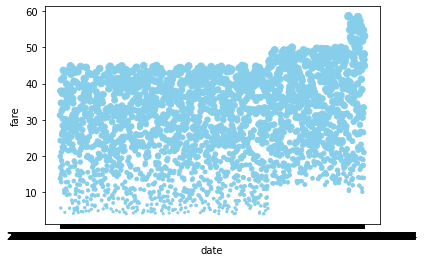

In [8]:
#Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_complete_df))
xtick_locations = [value for value in x_axis] 
ytick_locations = np.arange(0,55,5)
stdev = statistics.stdev(pyber_ride_complete_df["fare"])
stdev
#Plot the data
stdev 
pyber_ride_complete_df.plot(x="date", 
                   y="fare", 
                   kind="scatter", 
                   color="skyblue",
                   s="fare")

#plt.xticks(xtick_locations, pyber_ride_complete_df["date"])
#plt.yticks(ytick_locations)
plt.show()